In [1]:
# Start with imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading backup data
# df = pd.read_csv('./data/backup_data.csv')
df = pd.read_csv('./data/reddit_scrap.csv')
# Binary target
comment_median = df['num_comments'].median()
df['target'] = [1 if x>comment_median else 0 for x in df['num_comments']]

### Basic EDA
- *Having spent a majority of my time with this project building the scrapper and fitting the models, I have not been able to visualize the amount of data analysis that I would desire for this dataset. What follows are some simple observations on the baseline features and a couple of quickly engineered features for the EDA process.*

- Directly below is the top ten subreddits that contained the most threads appearing in the dataset. I wanted to show this data because the subreddit this was all scrapped from was Reddit's own 'r/popular' and specifically from 'hot' threads, that is, ones that are rising in popularity as time progresses. Seeing subreddits multiple times suggests that the subreddit itself is very popular and would garner a lot of engagment. 

In [3]:
# Top subreddits that appear the most in 'hot'
df.subreddit.value_counts().head(10)

MadeMeSmile           71
dankmemes             68
HolUp                 66
antiwork              66
shitposting           64
memes                 62
interestingasfuck     60
nextfuckinglevel      60
WhitePeopleTwitter    60
Superstonk            59
Name: subreddit, dtype: int64

#### Word Count
- Since I would be performing Natural Language Processing on the titles of these Reddit threads, I wondered if, naturally, the amount of words in a title had any significance on the amount of engagment. With that, I engineered a quick feature and found that 'low' engagement posts were averaging about 8 words per post, while 'high' engagement posts averaged almost 11 words per post.

In [4]:
# Add count of words in thread title
df['word_count'] = [len(x.split()) for x in df['title']]

In [5]:
# Mean word count of posts with low and high comments
df.groupby(by='target').agg({'word_count':'mean'})

,word_count
target,
0,8.314854
1,11.359381


Text(0, 0.5, 'Amount of Upvotes')

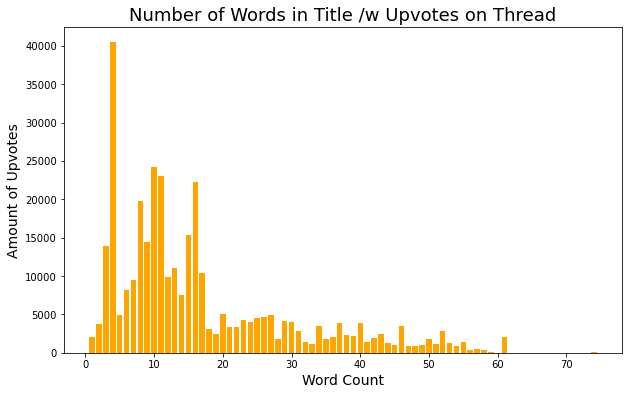

In [6]:
plt.figure(figsize = (10,6))

plt.bar(x = df.word_count, height = df.num_comments, color = 'orange')

plt.title('Number of Words in Title /w Upvotes on Thread', size = 18)
plt.xlabel('Word Count', size = 14)
plt.ylabel('Amount of Upvotes', size = 14)

*I further explored the amount of engagement vs. word count in the title by visualizing the amount of upvotes posts receive and the amount of words the titles contained. In general, from the bargraph there is a condensing of observations at a lower word count.*

## Recommendations
- Post in one of the reddit threads listed above with a title that asks a question to get the most engagment through comments on the thread
- Keep word count in your title at 15 words or less.
- Check with our trained Random Forest Model to predict whether a potential post will be successful based on the wording used in the title of the thread.